In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data1 = pd.read_csv(r"C:\projects_endtoend\Labmentix\Medibuddy_project\Medibuddy insurance data personal details (1) (2).xlsx - Sheet1.csv")

In [11]:
data1

,Policy no.,children,smoker,region
0,PLC157006,0,no,southwest
1,PLC157033,1,no,southwest
2,PLC157060,0,no,southwest
3,PLC157087,1,no,southwest
4,PLC157186,5,no,southwest
...,...,...,...,...
1333,PLC168400,1,yes,northeast
1334,PLC168436,0,yes,northeast
1335,PLC168634,2,yes,northeast
1336,PLC168652,0,yes,northeast


In [7]:
data2 = pd.read_csv(r"C:\projects_endtoend\Labmentix\Medibuddy_project\Medibuddy Insurance Data Price (1) (2).xlsx - Medibuddy Insurance Data Price .csv")

In [12]:
data2

,Policy no.,age,sex,bmi,charges in INR
0,PLC156898,19,female,27.900,16884.92400
1,PLC156907,18,male,33.770,1725.55230
2,PLC156916,28,male,33.000,4449.46200
3,PLC156925,33,male,22.705,21984.47061
4,PLC156934,32,male,28.880,3866.85520
...,...,...,...,...,...
1333,PLC168895,50,male,30.970,10600.54830
1334,PLC168904,18,female,31.920,2205.98080
1335,PLC168913,18,female,36.850,1629.83350
1336,PLC168922,21,female,25.800,2007.94500


In [9]:
data = pd.concat([data1,data2])

In [13]:
data.sample(5)

,Policy no.,children,smoker,region,age,sex,bmi,charges in INR
242,PLC159076,NaN,NaN,NaN,55.0,female,26.800,35160.13457
521,PLC168049,1.0,no,southeast,NaN,NaN,NaN,NaN
1218,PLC167860,NaN,NaN,NaN,46.0,female,34.600,41661.60200
136,PLC163324,0.0,no,southwest,NaN,NaN,NaN,NaN
1294,PLC168544,NaN,NaN,NaN,58.0,male,25.175,11931.12525


In [14]:
data.shape

(2676, 8)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2676 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Policy no.      2676 non-null   object 
 1   children        1338 non-null   float64
 2   smoker          1338 non-null   object 
 3   region          1338 non-null   object 
 4   age             1338 non-null   float64
 5   sex             1338 non-null   object 
 6   bmi             1338 non-null   float64
 7   charges in INR  1338 non-null   float64
dtypes: float64(4), object(4)
memory usage: 188.2+ KB


In [29]:
data.columns

Index(['Policy no.', 'children', 'smoker', 'region', 'age', 'sex', 'bmi',
       'charges in INR'],
      dtype='object')

In [16]:
data.duplicated().sum()

0

In [17]:
data.isnull().sum()

Policy no.           0
children          1338
smoker            1338
region            1338
age               1338
sex               1338
bmi               1338
charges in INR    1338
dtype: int64

### Handling missing values

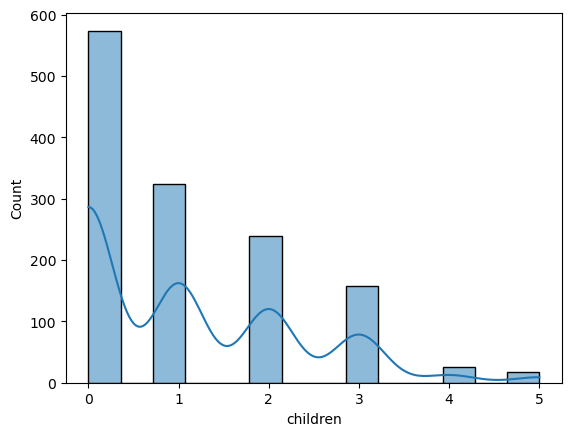

In [20]:
sns.histplot(data['children'], kde=True)
plt.show()

In [19]:
data['children'].skew()

0.9383804401702414

* since the childen column is moderately positively skewed and has slightly longer tails, we impute the missing values with median.

In [21]:
data['children'] = data['children'].fillna(data['children'].median())

In [22]:
data['children'].isna().sum()

0

* since smoker,region,sex columns are categorical, we impute missing values with mode

In [27]:
data['smoker'] = data['smoker'].fillna(data['smoker'].mode()[0])

In [28]:
data['smoker'].isna().sum()

0

In [30]:
data['region'] = data['region'].fillna(data['region'].mode()[0])

In [31]:
data['region'].isna().sum()

0

In [32]:
data['sex'] = data['sex'].fillna(data['sex'].mode()[0])

In [33]:
data['sex'].isna().sum()

0

In [39]:
data['age'] = data['age'].fillna(data['age'].median())
data['bmi'] = data['bmi'].fillna(data['bmi'].median())
data['charges in INR'] = data['charges in INR'].fillna(data['charges in INR'].median())

In [40]:
data.isna().sum()

Policy no.        0
children          0
smoker            0
region            0
age               0
sex               0
bmi               0
charges in INR    0
dtype: int64

In [41]:
data.describe()

,children,age,bmi,charges in INR
count,2676.000000,2676.000000,2676.000000,2676.000000
mean,1.047459,39.103513,30.531698,11326.227633
std,0.853574,9.933505,4.313275,8779.526196
min,0.000000,18.000000,15.960000,1121.873900
25%,1.000000,39.000000,30.400000,9381.000925
50%,1.000000,39.000000,30.400000,9382.033000
75%,1.000000,39.000000,30.400000,9383.065075
max,5.000000,64.000000,53.130000,63770.428010


### 1. Does the gender of the person matter for the company as a constraint for extending policies?

In [49]:
data['sex'].value_counts()

sex
male      2014
female     662
Name: count, dtype: int64

In [ ]:
## avg charges by gender

data.groupby('sex')['charges in INR'].mean()

sex
female    12569.578844
male      10917.539201
Name: charges in INR, dtype: float64

<Axes: xlabel='sex', ylabel='charges in INR'>

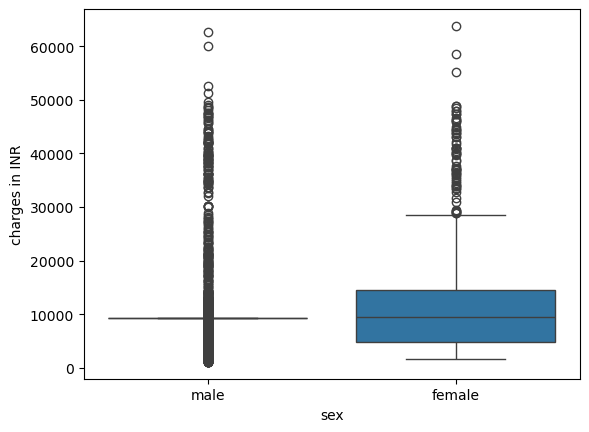

In [51]:
sns.boxplot(x='sex',y='charges in INR',data=data)

<Axes: xlabel='sex', ylabel='charges in INR'>

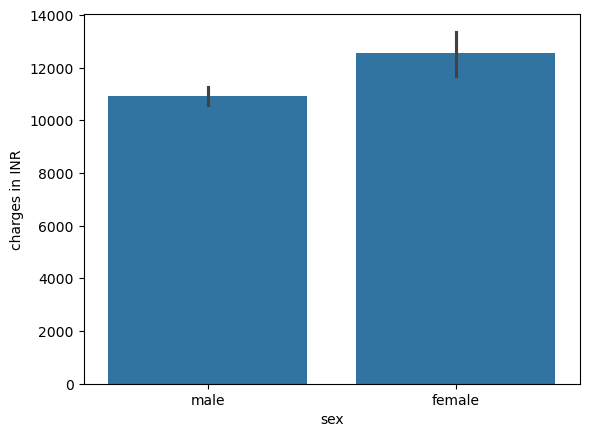

In [52]:
sns.barplot(x=data['sex'],y=data['charges in INR'])

### Insights:

* Boxplot: The median for females is slightly higher than the males, which means the medical charges of women are slightly higher than the male(but the difference is not drastic)

* Both genders have outlioers but male has significantly higher outliers than female, so some male policyholders may incure high cherges.

* In Barplot, females have higher average insurance charges than males.

* In clonclusion, gender might not be a strict constraint for different policy structure but it can influence pricing models due to differences in claim behavior.

### 2. What is the average amount of money the company spent over each policy cover?

In [53]:
data['charges in INR'].mean()

11326.227632570626

### Insights:
* On average, the company spends ₹11326.22 per insurance policy cover. This value represents the typical amount by the company per individual policy.

### 3. Could you advice if the company needs to offer separate policies based upon the geographic location of the person?

In [54]:
data['region'].value_counts()

region
southeast    1702
southwest     325
northwest     325
northeast     324
Name: count, dtype: int64

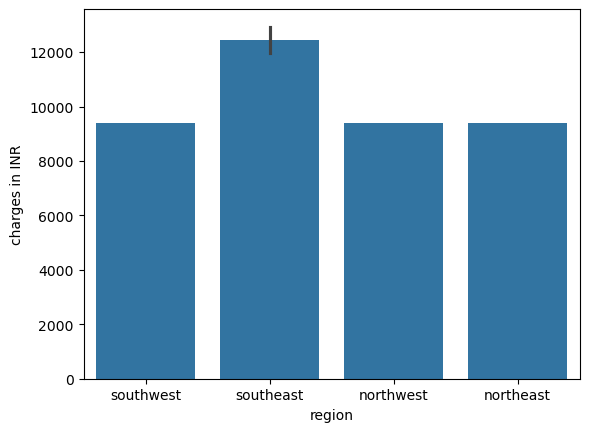

In [55]:
sns.barplot(x=data['region'],y=data['charges in INR'])
plt.show()

### Insights: 
* The southeast region has the highest insurance charges(may be due to lifestyle,high healthcare costs and high risk factors) whereas southwest, northwest and northeast regions have similar and significantly lower charges.

* In conclusion, the company should consider offering separate policies based on geographic location.

### 4. Does the no. of dependents make a difference in the amount claimed?

<Axes: xlabel='children', ylabel='charges in INR'>

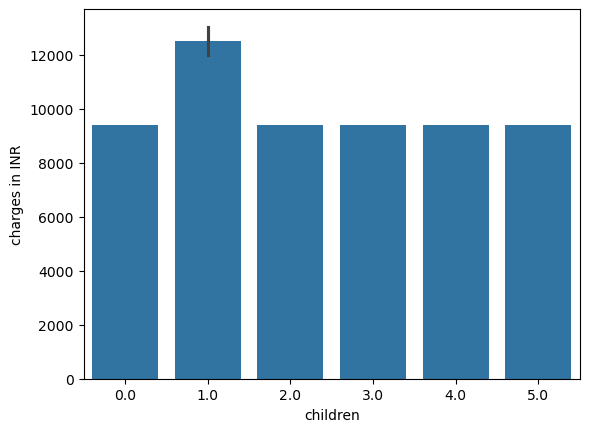

In [58]:
sns.barplot(x=data['children'],y=data['charges in INR'])

### Insights:
* Though the charges have increased when the no. of childer is 1 and after that it starts to fall.

* So there is no significant increase or decrease with more children ( except for a spike at 1 child)

### 5. Does a study of persons BMI get the company any idea for the insurance claim that it would extend?

In [62]:
correlation = data['bmi'].corr(data['charges in INR'])
print(correlation)

0.20008860184891045


### Insights:
* since correlation is <0.3, there is a moderate correlation b/w bmi and charges

<Axes: xlabel='bmi', ylabel='charges in INR'>

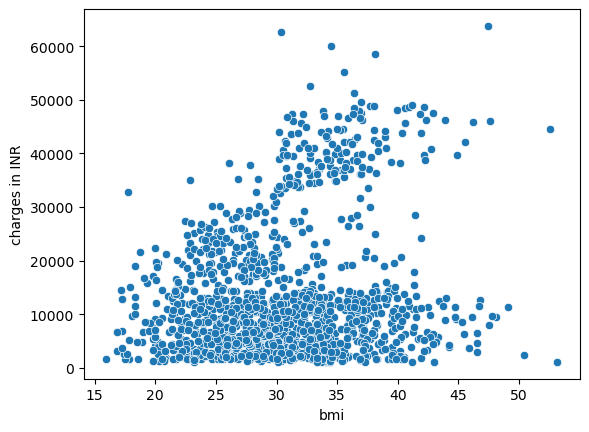

In [63]:
sns.scatterplot(x=data['bmi'],y=data['charges in INR'])

### Insights from scatterplot:
* As the bmi increases there is a significant increase the charges for some people.

* majority of the people claims lowerr range of charges irrespective of bmi.

* A cluster of high charges starts appearing especially above BMI ~30, which could indicate obesity-related health risks.

### 6. Is it needed for the company to understand whether the person covered is a smoker or a non-smoker?

In [66]:
data['smoker'].value_counts()

smoker
no     2402
yes     274
Name: count, dtype: int64

<Axes: xlabel='smoker', ylabel='charges in INR'>

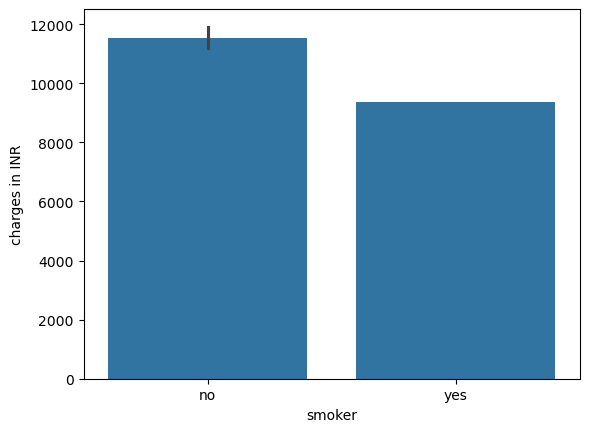

In [67]:
sns.barplot(x=data['smoker'],y=data['charges in INR'])

In [68]:
data.groupby('smoker')['charges in INR'].mean()

smoker
no     11548.005039
yes     9382.033000
Name: charges in INR, dtype: float64

### Insights:
* On an avg a smoker has to 9382.033 whereas a non-smoker has to pay  11548.005
* A person who is a non-smoker has the highest charges than the smoker

### 7. Does age have any barrier on the insurance claimed?

In [74]:
pd.DataFrame(data.groupby('age')['charges in INR'].mean())

,charges in INR
age,
18.0,7086.217556
19.0,9747.909335
20.0,10159.697736
21.0,4730.464330
22.0,10012.932802
23.0,12419.820040
24.0,10648.015962
25.0,9838.365311
26.0,6133.825309


In [75]:
data['age'].corr(data['charges in INR'])

0.29387439037076096

* There is a weak correlation b/w age and charges in INR

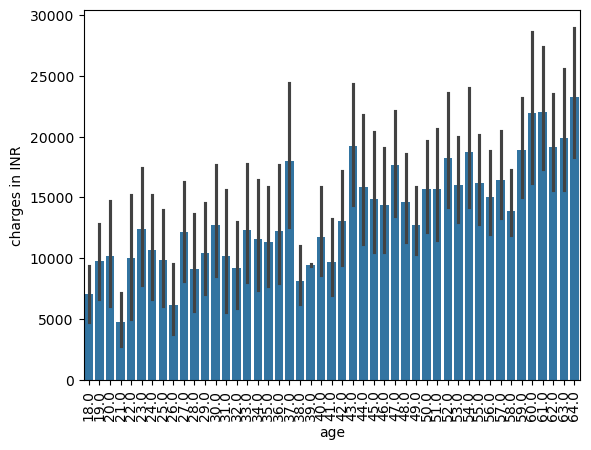

In [72]:
sns.barplot(x=data['age'],y=data['charges in INR'])
plt.xticks(rotation='vertical')
plt.show()

### Insights:
* There is specific age where charges are increasing significantly, but after a period of time, charges are increased as age increases.

* In summary, there seems to be a trend indicating that age could impact insurance charges.

### 8. Can the company extend certain discounts after checking the health status (BMI) in this case?

<Axes: xlabel='bmi', ylabel='charges in INR'>

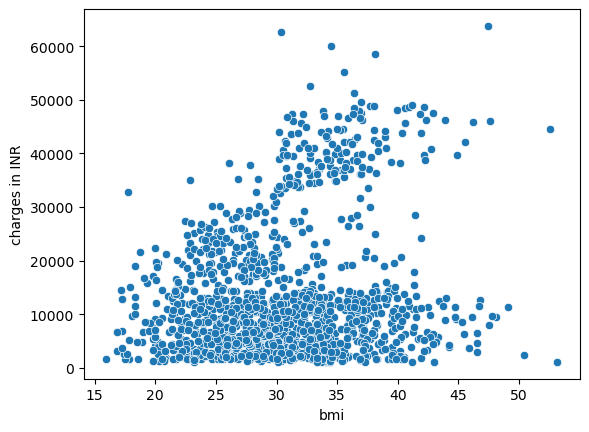

In [77]:
sns.scatterplot(data=data, x='bmi', y='charges in INR')

<Axes: xlabel='bmi_category', ylabel='charges in INR'>

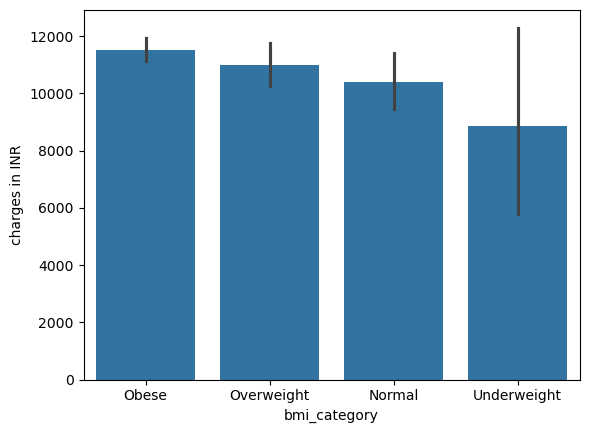

In [81]:
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

data['bmi_category'] = data['bmi'].apply(bmi_category)
sns.barplot(data=data, x='bmi_category', y='charges in INR')


### Insights:
* Obese individuals has higher charges, Overweight and Normal categories has slightly lower charges and Underweight individuals have the lowest average charges.

* Discounts should go to low-risk (Normal BMI) individuals as a reward, and behavior-based incentives can be offered to higher-risk groups (like Obese) to motivate improvement.

* This strategy encourages healthy behavior while keeping the insurance model financially sustainable.

## Preprocessing

In [82]:
data.head()

,Policy no.,children,smoker,region,age,sex,bmi,charges in INR,bmi_category
0,PLC157006,0.0,no,southwest,39.0,male,30.4,9382.033,Obese
1,PLC157033,1.0,no,southwest,39.0,male,30.4,9382.033,Obese
2,PLC157060,0.0,no,southwest,39.0,male,30.4,9382.033,Obese
3,PLC157087,1.0,no,southwest,39.0,male,30.4,9382.033,Obese
4,PLC157186,5.0,no,southwest,39.0,male,30.4,9382.033,Obese


In [91]:
data.drop(['Policy no.','bmi_category'],axis=1,inplace=True)

In [85]:
data.duplicated().sum()

0

In [86]:
data.isna().sum()

Policy no.        0
children          0
smoker            0
region            0
age               0
sex               0
bmi               0
charges in INR    0
bmi_category      0
dtype: int64

In [87]:
from sklearn.preprocessing import LabelEncoder

encode=LabelEncoder()

In [ ]:
## encoding categorical features

data['sex'] = encode.fit_transform(data['sex'])
data['smoker'] = encode.fit_transform(data['smoker'])
data['region'] = encode.fit_transform(data['region'])

In [94]:
data.tail()

,children,smoker,region,age,sex,bmi,charges in INR
1333,1.0,0,2,50.0,1,30.97,10600.5483
1334,1.0,0,2,18.0,0,31.92,2205.9808
1335,1.0,0,2,18.0,0,36.85,1629.8335
1336,1.0,0,2,21.0,0,25.80,2007.9450
1337,1.0,0,2,61.0,0,29.07,29141.3603


<Axes: >

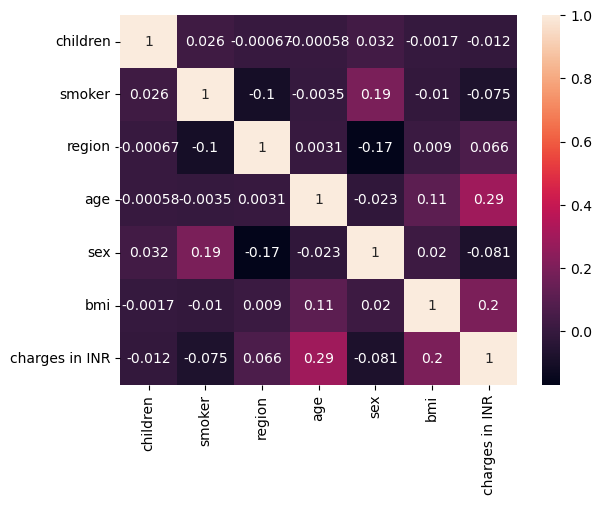

In [95]:
sns.heatmap(data.corr(),annot=True)

## Model Building

* our goal is to predict charges in INR based on independent features(children,smoker,region,age,sex,bmi)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression, Ridge, Lasso

import numpy as np

In [102]:
X = data.drop('charges in INR',axis=1)
y = data['charges in INR']

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [120]:
models = {
    'Linear regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
}

In [121]:
for name,model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(f'{name} R2 score: {r2_score(y_test,y_pred)}')
    print(f'{name} MAE: {mean_absolute_error(y_test,y_pred)}')
    print(f'{name} MSE: {mean_squared_error(y_test,y_pred)}')
    print(f'{name} RMSE: {np.sqrt(mean_squared_error(y_test,y_pred))}')
    print('----------------------------------')

Linear regression R2 score: 0.11887252265440473
Linear regression MAE: 5036.909296849187
Linear regression MSE: 67366929.55887942
Linear regression RMSE: 8207.735958160412
----------------------------------
Ridge R2 score: 0.11886865826346826
Ridge MAE: 5036.4368338229315
Ridge MSE: 67367225.01232822
Ridge RMSE: 8207.75395661494
----------------------------------
Lasso R2 score: 0.11886414598307615
Lasso MAE: 5036.342736386245
Lasso MSE: 67367570.00040673
Lasso RMSE: 8207.77497257367
----------------------------------
